# Problem Set  4

### MACS 30200 
### Xiuyuan Zhang

In [1]:
# import the library 
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

### Problem(1)

#### Part(a)

In [9]:
T = 500
sigma = 0.7
mu=11.4
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [3]:
def z_tp1_func(z_t, epsilon, rho=0.85, mu=11.4):
    z = rho * z_t + (1 - rho) * mu + epsilon
    return z

In [4]:
z_current = 11.4
z_tp1_vector = np.zeros(T)

for z_tp1_index in range(T):
    z = z_tp1_func(z_t=z_current, epsilon=eps_vec[z_tp1_index])
    z_tp1_vector[z_tp1_index] = z
    z_current = z

In [6]:
print(z_tp1_vector)

[ 12.18888469  12.2159573   11.68315782  11.01553877  10.91590679
  10.1567745   10.68040553  10.67842452  10.88565201  10.72508687
  10.65326395   9.91791397  10.04701032  10.40104919   9.86045939
  10.12776085  10.00300618  10.57799829  10.46230611  11.28872644
  11.27266911  11.3207326   11.12438321  13.13436557  12.89920999
  12.77832705  11.29822341  11.72133346  11.53360466  11.40244288
  10.99761888  11.95615748  12.17992382  11.98569528  11.51007151
  11.53889543  11.62239461  12.05084072  12.61656985  13.08475995
  11.83484479  12.02965801  11.58664022  11.60122697  12.78131856
  13.40791974  12.73042248  12.55257799  11.43553918  11.68434424
  10.86117739  11.45112658  10.44432582  10.28175407  10.77658964
  10.88626827  11.24280425  11.44757108  11.84646005  11.62959357
  11.41153827  12.06439749  12.35733626  11.30835897  12.0244509
  11.82656181  11.53766332  12.47163416  12.39492366  11.77780097
  10.37762915   9.95735122  10.33462467   9.80873854  10.7347655
  11.3638155

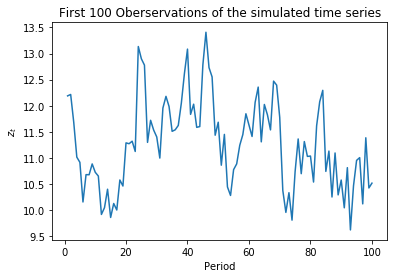

In [7]:
# Plot the first 100 observations
periods_to_plot = 100
z_tp1_vector_truncated = z_tp1_vector[0:periods_to_plot]
plt.plot(np.arange(1, periods_to_plot + 1), z_tp1_vector_truncated, '-')
plt.title("First 100 Oberservations of the simulated time series")
plt.ylabel("$z_t$")
plt.xlabel("Period")
plt.show()

#### Part(b)

In [10]:
lower_bound = mu - 3*sigma
upper_bound = mu + 3*sigma
z_vals = np.array([lower_bound,(mu-lower_bound)/2+lower_bound,mu,(upper_bound-mu)/2+mu,upper_bound])
z_vals

array([  9.3 ,  10.35,  11.4 ,  12.45,  13.5 ])

#### Part(c)

In [12]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
print(z_cuts)

[  9.825  10.875  11.925  12.975]


In [13]:
bins = np.digitize(z_tp1_vector, z_cuts)

In [14]:
print(bins)

[3 3 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 4 3 3 2 2 2 2 2 3 3 3 2 2 2
 3 3 4 2 3 2 2 3 4 3 3 2 2 1 2 1 1 1 2 2 2 2 2 2 3 3 2 3 2 2 3 3 2 1 1 1 0
 1 2 1 2 2 2 1 2 3 3 1 2 1 2 1 1 1 1 0 1 2 2 1 2 1 1 2 1 1 2 2 1 1 1 3 3 3
 3 3 2 3 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 3 2 4 3 3 3 2 3 4 4 3 4 4 3 2 2 2 1
 1 0 0 0 0 2 2 3 3 1 1 2 2 3 3 3 3 2 3 2 0 1 0 0 0 0 0 0 0 0 0 1 1 2 1 2 2
 4 3 4 3 3 2 2 1 1 1 0 0 1 2 2 2 2 2 1 1 2 2 2 2 2 3 3 3 2 1 1 1 1 1 1 1 1
 2 3 3 2 2 2 2 1 1 2 2 2 0 0 0 1 1 1 0 1 2 2 1 1 1 1 2 1 1 1 0 1 1 2 2 3 2
 3 3 3 3 2 1 1 3 3 3 3 4 4 3 3 2 1 2 2 1 1 1 2 0 0 0 0 0 0 0 0 1 1 2 2 2 2
 3 3 2 2 2 1 1 1 1 1 1 2 1 1 1 2 2 3 3 4 4 4 4 4 4 4 3 3 3 3 3 3 2 1 2 3 3
 4 3 3 2 2 2 2 2 2 2 2 2 4 3 3 3 4 4 3 3 3 3 3 3 3 4 4 4 4 4 4 3 3 2 2 1 2
 1 1 1 3 2 3 2 2 3 2 2 2 3 3 3 2 2 3 4 3 2 1 1 1 1 2 3 3 3 1 0 1 0 2 1 1 2
 3 3 3 2 2 1 2 3 3 2 2 2 3 2 2 3 2 2 2 1 0 1 2 2 2 3 4 4 4 4 4 4 4 4 4 4 4
 4 3 2 4 3 3 4 3 2 3 2 2 2 2 2 3 2 3 3 3 1 2 1 1 1 2 2 3 2 3 3 2 3 3 2 3 1
 1 2 2 0 0 1 2 4 4 4 4 2 

In [15]:
P_hat = np.zeros(shape=(5,5))

In [16]:
for i in range(0,5):
    for j in range(0,5):
        count = 0
        denom = 0
        for k in range(0,499):
            curr = bins[k]
            nxt = bins[k+1]
            if curr == i and nxt == j:
                count += 1
            if curr == i:
                denom += 1
        P_hat[i][j] = count/denom

In [17]:
print(P_hat)

[[ 0.69387755  0.26530612  0.04081633  0.          0.        ]
 [ 0.09166667  0.55        0.325       0.03333333  0.        ]
 [ 0.03067485  0.2208589   0.48466258  0.22699387  0.03680982]
 [ 0.          0.04201681  0.34453782  0.50420168  0.1092437 ]
 [ 0.          0.          0.04166667  0.35416667  0.60416667]]


#### Part(d)

In [18]:
import numpy.linalg as LA

x = np.array([0,0,1,0,0]).reshape(5,1)
result = np.dot(LA.matrix_power(P_hat.T, 3), x)
print(r'P(z_{t+3}=5|z_t=3)=', result[4])

P(z_{t+3}=5|z_t=3)= [ 0.08021671]


#### Part(e)

In [19]:
eigvals, eigvecmat = LA.eig(P_hat.T)
print(eigvals)
print(eigvecmat)

[ 1.          0.76699244  0.576021    0.12361033  0.3702847 ]
[[-0.21569643 -0.55748862  0.47214975 -0.01733209 -0.17180269]
 [-0.49786427 -0.47702859 -0.39566684  0.37212405  0.68729659]
 [-0.66477792  0.09672098 -0.6316733  -0.78981484 -0.24150297]
 [-0.47579105  0.54815821  0.09402908  0.484713   -0.58546399]
 [-0.19313059  0.38963802  0.4611613  -0.04969012  0.31147306]]


In [20]:
eigvals = np.around(eigvals, decimals=2)
one_ind = np.argwhere(eigvals == 1).flatten()
eigvec = eigvecmat[:, one_ind] / eigvecmat[:, one_ind].sum()
stat_dist = eigvec
print("State dist is:", stat_dist)

State dist is: [[ 0.10535858]
 [ 0.24318563]
 [ 0.32471588]
 [ 0.23240379]
 [ 0.09433612]]


#### Part(f)

In [22]:
z_0 = z_vals[2]
x_vec = np.zeros(T)
x_t = z_0
xt_ind = 1
for t_ind in range(T):
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(P_hat[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    x_t = x_tp1
    xt_ind = xtp1_ind

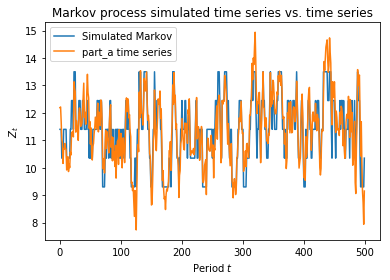

In [23]:
plt.plot(x_vec)
plt.plot(z_tp1_vector)
plt.title(r'Markov process simulated time series vs. time series')
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['Simulated Markov', 'part_a time series'])
plt.show()